### The data set has information about features of silhouette extracted from the images of different cars

Four "Corgie" model vehicles were used for the experiment: a double decker bus, Cheverolet van, Saab 9000 and an Opel Manta 400 cars. This particular combination of vehicles was chosen with the expectation that the bus, van and either one of the cars would be readily distinguishable, but it would be more difficult to distinguish between the cars.



### 1. Read the dataset using function .dropna() - to avoid dealing with NAs as of now

In [9]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pylab as plt
import seaborn as sns
%matplotlib inline

In [3]:
df = pd.read_csv("vehicle.csv")

In [4]:
df.shape

(846, 19)

In [6]:
df.dropna(inplace=True)

In [7]:
df.shape

(813, 19)

In [8]:
df.describe().T

count        mean         std    min    25%  \
compactness                  813.0   93.656827    8.233751   73.0   87.0   
circularity                  813.0   44.803198    6.146659   33.0   40.0   
distance_circularity         813.0   82.043050   15.783070   40.0   70.0   
radius_ratio                 813.0  169.098401   33.615402  104.0  141.0   
pr.axis_aspect_ratio         813.0   61.774908    7.973000   47.0   57.0   
max.length_aspect_ratio      813.0    8.599016    4.677174    2.0    7.0   
scatter_ratio                813.0  168.563346   33.082186  112.0  146.0   
elongatedness                813.0   40.988930    7.803380   26.0   33.0   
pr.axis_rectangularity       813.0   20.558426    2.573184   17.0   19.0   
max.length_rectangularity    813.0  147.891759   14.504648  118.0  137.0   
scaled_variance              813.0  188.377614   31.165873  130.0  167.0   
scaled_variance.1            813.0  438.382534  175.270368  184.0  318.0   
scaled_radius_of_gyration    813.0  174.252153   32.332161  109.0  149.0   
scaled_radius_of_gyration.1  813.0   72.399754    7.475994   59.0   67.0   
skewness_about               813.0    6.351784    4.921476    0.0    2.0   
skewness_about.1             813.0   12.687577    8.926951    0.0    6.0   
skewness_about.2             813.0  188.979090    6.153681  176.0  184.0   
hollows_ratio                813.0  195.729397    7.398781  181.0  191.0   

                               50%    75%     max  
compactness                   93.0  100.0   119.0  
circularity                   44.0   49.0    59.0  
distance_circularity          79.0   98.0   112.0  
radius_ratio                 167.0  195.0   333.0  
pr.axis_aspect_ratio          61.0   65.0   138.0  
max.length_aspect_ratio        8.0   10.0    55.0  
scatter_ratio                157.0  198.0   265.0  
elongatedness                 43.0   46.0    61.0  
pr.axis_rectangularity        20.0   23.0    29.0  
max.length_rectangularity    146.0  159.0   188.0  
scaled_variance              179.0  217.0   320.0  
scaled_variance.1            364.0  586.0  1018.0  
scaled_radius_of_gyration    173.0  198.0   268.0  
scaled_radius_of_gyration.1   71.0   75.0   135.0  
skewness_about                 6.0    9.0    22.0  
skewness_about.1              11.0   19.0    41.0  
skewness_about.2             189.0  193.0   206.0  
hollows_ratio                197.0  201.0   211.0

### 2. Print/ Plot the dependent (categorical variable) - Class column

Since the variable is categorical, you can use value_counts function

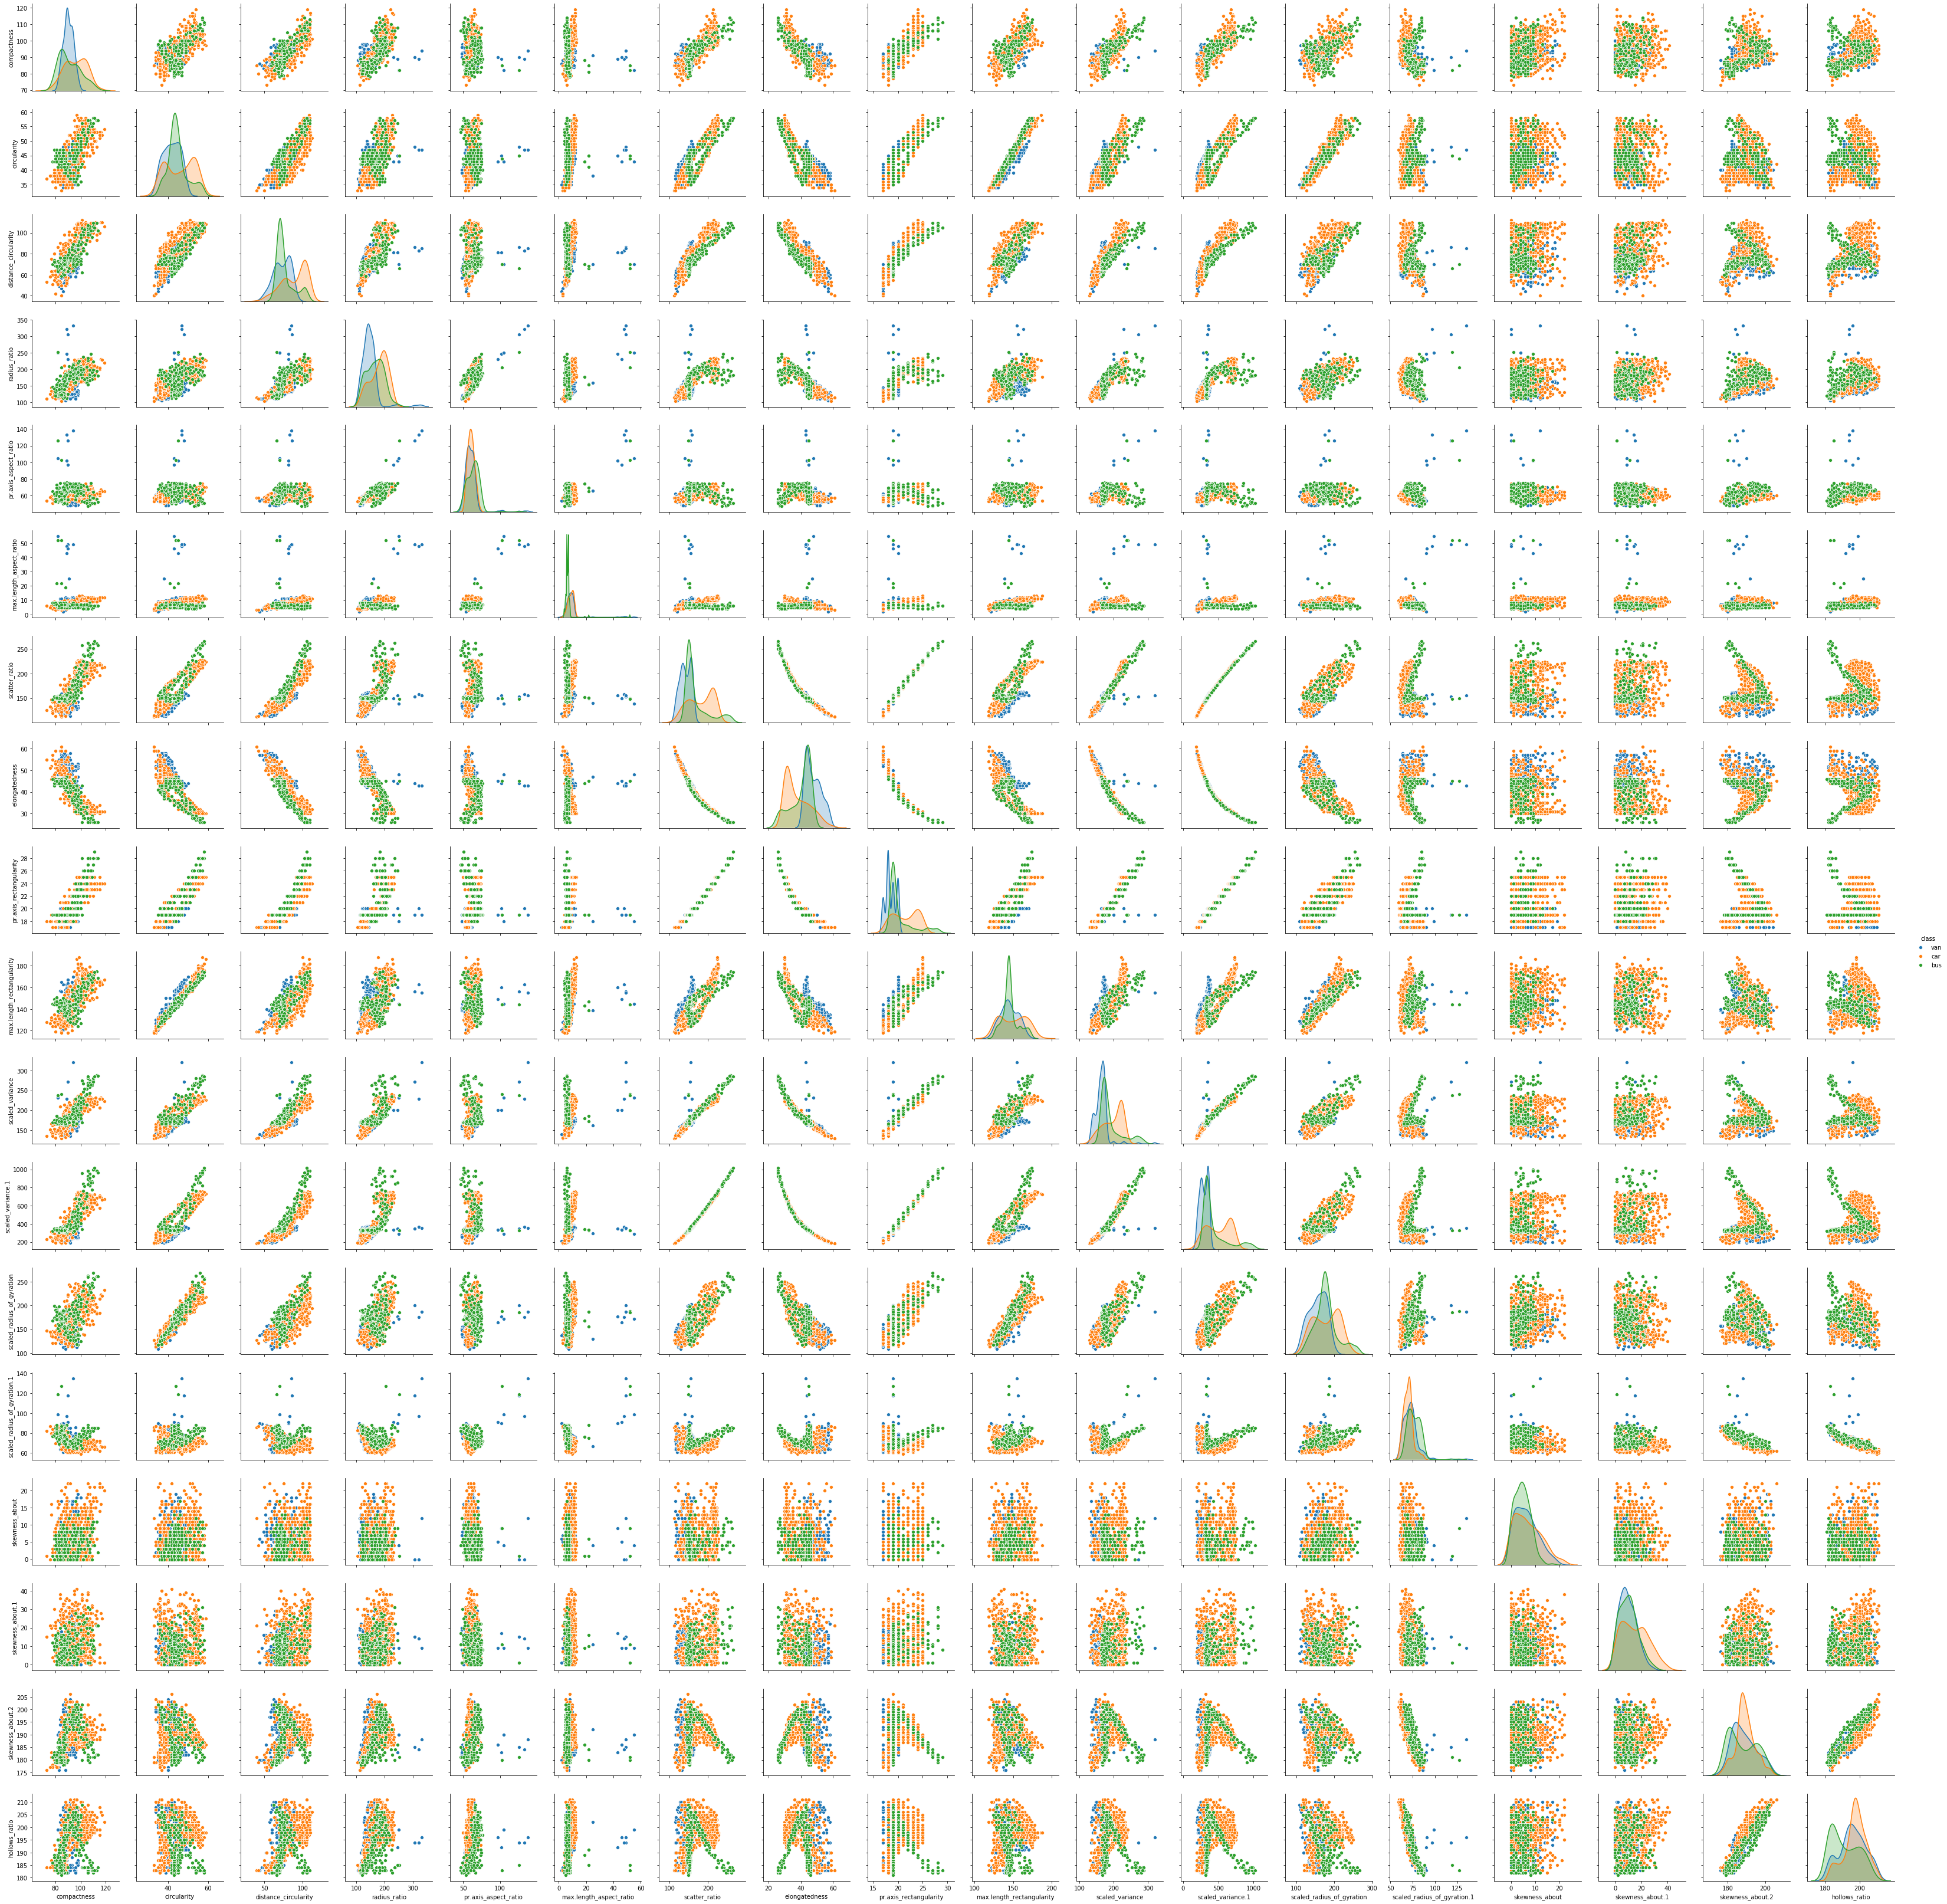

In [10]:
sns.pairplot(df, hue='class', diag_kind='kde')

### Check for any missing values in the data 

In [12]:
df.isna().sum()

compactness                    0
circularity                    0
distance_circularity           0
radius_ratio                   0
pr.axis_aspect_ratio           0
max.length_aspect_ratio        0
scatter_ratio                  0
elongatedness                  0
pr.axis_rectangularity         0
max.length_rectangularity      0
scaled_variance                0
scaled_variance.1              0
scaled_radius_of_gyration      0
scaled_radius_of_gyration.1    0
skewness_about                 0
skewness_about.1               0
skewness_about.2               0
hollows_ratio                  0
class                          0
dtype: int64

### 3. Standardize the data 

In [13]:
from scipy.stats import zscore

Since the dimensions of the data are not really known to us, it would be wise to standardize the data using z scores before we go for any clustering methods.
You can use zscore function to do this

In [14]:
num_df = df.drop('class', axis=1)

In [15]:
class_df = df['class']

In [16]:
num_df = num_df.apply(zscore)

In [17]:
vdf = num_df.join(class_df) 

In [18]:
vdf.head()

compactness  circularity  distance_circularity  radius_ratio  \
0     0.163231     0.520408              0.060669      0.264970   
1    -0.322874    -0.619123              0.124067     -0.836393   
2     1.256966     0.845988              1.518823      1.187734   
3    -0.079822    -0.619123             -0.002729     -0.300595   
4    -1.052030    -0.130753             -0.763506      1.068668   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0              1.283254                 0.299721      -0.198517   
1             -0.599253                 0.085785      -0.591720   
2              0.530251                 0.299721       1.162569   
3              0.153750                 0.085785      -0.742952   
4              5.173770                 9.285029      -0.591720   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0       0.129648               -0.217151                   0.766312   
1       0.514333               -0.606014                  -0.337462   
2      -1.152637                0.949438                   0.697326   
3       0.642562               -0.606014                  -0.337462   
4       0.514333               -0.606014                  -0.268476   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0        -0.397397          -0.339014                   0.301676   
1        -0.590034          -0.618754                  -0.502972   
2         1.111591           1.122486                   1.415804   
3        -0.911095          -0.738643                  -1.462359   
4         1.689501          -0.647299                   0.425468   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                    -0.321192       -0.071523          0.371287   
1                    -0.053505        0.538425          0.147109   
2                     0.080339        1.555006         -0.413338   
3                    -1.258099       -0.071523         -0.301249   
4                     7.307905        0.538425         -0.189159   

   skewness_about.2  hollows_ratio class  
0         -0.321809       0.171837   van  
1          0.003400       0.442318   van  
2         -0.159204       0.036596   car  
3          1.629444       1.524243   van  
4         -1.460039      -1.721531   bus

### K - Means Clustering

### Assign a dummy array called distortion

In [19]:
distortion = []

### 5. Calculating distortion - C distance

Iterating values of k from 1 to 10 fit K means model
Using c distance - Get the measure for Sum of squares error.

In [20]:
vdf_attributes = vdf.drop('class', axis=1)

Iterating values of k from 1 to 10 fit K means model
Using c distance - Get the measure for Sum of squares error.

In [21]:
#Finding optimal no. of clusters
from scipy.spatial.distance import cdist
clusters=range(1,10)

In [22]:
#Iterating values of k from 1 to 10 fit K means model
for k in clusters:
    model=KMeans(n_clusters=k).fit(vdf_attributes)
    dist = sum(np.min(cdist(vdf_attributes, model.cluster_centers_, 'euclidean'), axis=1))
    distortion.append( dist / vdf_attributes.shape[0])

In [23]:
distortion

[3.939299196727955,
 2.966824380205441,
 2.6428664657321073,
 2.550932922462575,
 2.4285343125776913,
 2.315349380749559,
 2.2421006157090035,
 2.1703318002269945,
 2.103151713906056]

### 6. Plotting Elbow/ Scree Plot

Text(0.5, 1.0, 'Selecting k with the Elbow Method')

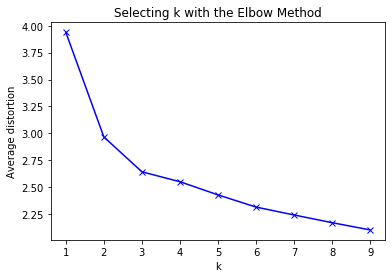

In [24]:
plt.plot(range(1,10), distortion, 'bx-')
plt.xlabel('k')
plt.ylabel('Average distortion')
plt.title('Selecting k with the Elbow Method')

Use Matplotlib to plot the scree plot - Note: Scree plot plots distortion vs the no of clusters

### Find out the optimal value of K

In [25]:
# Lets use k = 3
final_model=KMeans(3)
final_model.fit(vdf_attributes)
prediction=final_model.predict(vdf_attributes)

In [26]:
#Append the prediction 
vdf["Group"] = prediction
print("Group Assigned : \n")
vdf[["class", "Group"]]

Group Assigned : 



class  Group
0     van      2
1     van      2
2     car      1
3     van      2
4     bus      0
6     bus      2
7     van      2
8     van      2
10    van      2
11    car      2
12    bus      2
13    van      2
14    bus      2
15    car      1
16    van      0
17    bus      2
18    car      1
20    bus      0
21    van      0
22    bus      2
23    bus      2
24    car      1
25    van      2
26    car      0
27    car      1
28    bus      1
29    car      0
30    van      2
31    car      2
32    car      2
..    ...    ...
816   van      2
817   car      1
818   car      1
819   car      2
820   car      0
821   car      1
822   van      2
823   car      1
824   car      1
825   car      0
826   car      2
827   car      1
828   van      0
829   van      0
830   bus      2
831   bus      2
832   car      1
833   car      0
834   car      0
835   bus      1
836   van      0
837   car      2
838   van      2
839   van      2
840   car      2
841   car      2
842   van      2
843   car      1
844   car      2
845   van      0

[813 rows x 2 columns]

### Using optimal value of K - Cluster the data. 
Note: Since the data has more than 2 dimension we cannot visualize the data. As an alternative, we can observe the centroids and note how they are distributed across different dimensions

In [27]:
u=final_model.cluster_centers_

In [28]:
u

array([[-0.91400071, -0.51327609, -0.88664922, -1.05602904, -0.49182906,
        -0.21883169, -0.775563  ,  0.85996991, -0.74203582, -0.47827281,
        -0.77910348, -0.78034412, -0.37943428,  0.82611912, -0.08658373,
        -0.30355495, -1.04650237, -1.10265258],
       [ 1.13076532,  1.17094237,  1.19500584,  1.01909505,  0.21505188,
         0.34250798,  1.27180461, -1.19061224,  1.27548416,  1.09266768,
         1.22038121,  1.28132727,  1.07954232, -0.02879497,  0.16229031,
         0.26566456, -0.00535553,  0.18380067],
       [-0.2319252 , -0.57973847, -0.30724438, -0.02693437,  0.20516443,
        -0.11572895, -0.45873352,  0.32447256, -0.48810058, -0.54152679,
        -0.41282893, -0.46297248, -0.60799507, -0.62342017, -0.06824398,
         0.01513248,  0.82481456,  0.71018194]])

You can use kmeans.cluster_centers_ function to pull the centroid information from the instance

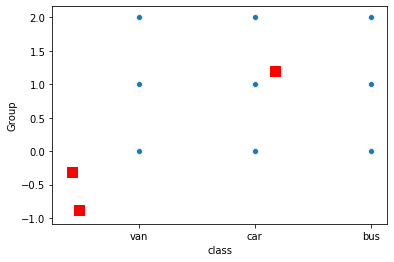

In [29]:
sns.scatterplot(x=vdf['class'], y=vdf['Group'], data=vdf_attributes, palette='spring')
plt.scatter(final_model.cluster_centers_[:,1], final_model.cluster_centers_[:,2], s=100, marker='s', c='red', label='Centroids')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a2c664550>,
      dtype=object)

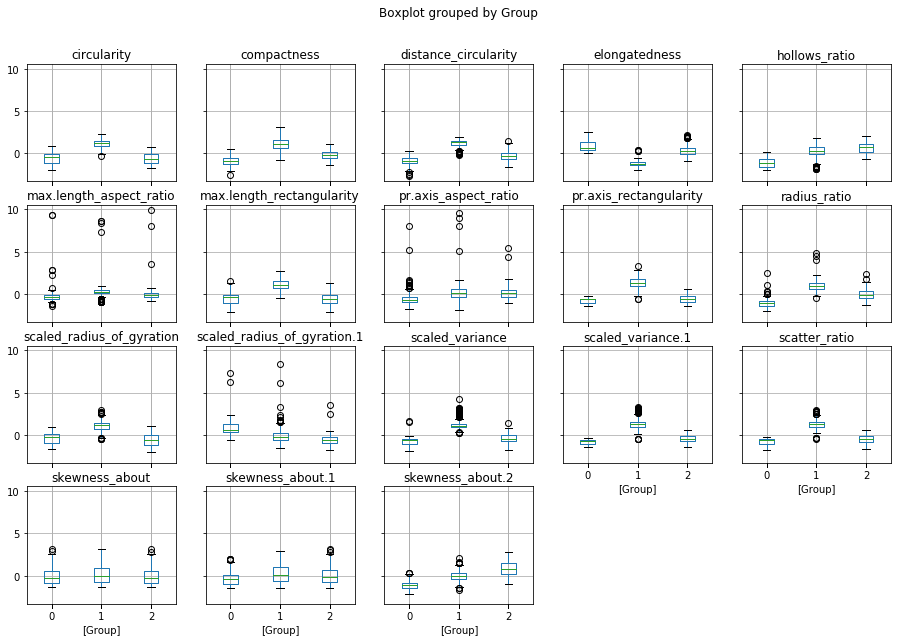

In [30]:
vdf.boxplot(by = 'Group',  layout=(4,5), figsize=(15, 10))

### 7. Store the centroids in a dataframe with column names from the original dataset given 

In [31]:
vdf_attributes.columns

Index(['compactness', 'circularity', 'distance_circularity', 'radius_ratio',
       'pr.axis_aspect_ratio', 'max.length_aspect_ratio', 'scatter_ratio',
       'elongatedness', 'pr.axis_rectangularity', 'max.length_rectangularity',
       'scaled_variance', 'scaled_variance.1', 'scaled_radius_of_gyration',
       'scaled_radius_of_gyration.1', 'skewness_about', 'skewness_about.1',
       'skewness_about.2', 'hollows_ratio'],
      dtype='object')

Hint: Use pd.Dataframe function 

In [32]:
centroids_df = pd.DataFrame(final_model.cluster_centers_,columns=vdf_attributes.columns)

In [33]:
centroids_df

compactness  circularity  distance_circularity  radius_ratio  \
0    -0.914001    -0.513276             -0.886649     -1.056029   
1     1.130765     1.170942              1.195006      1.019095   
2    -0.231925    -0.579738             -0.307244     -0.026934   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0             -0.491829                -0.218832      -0.775563   
1              0.215052                 0.342508       1.271805   
2              0.205164                -0.115729      -0.458734   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0       0.859970               -0.742036                  -0.478273   
1      -1.190612                1.275484                   1.092668   
2       0.324473               -0.488101                  -0.541527   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0        -0.779103          -0.780344                  -0.379434   
1         1.220381           1.281327                   1.079542   
2        -0.412829          -0.462972                  -0.607995   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                     0.826119       -0.086584         -0.303555   
1                    -0.028795        0.162290          0.265665   
2                    -0.623420       -0.068244          0.015132   

   skewness_about.2  hollows_ratio  
0         -1.046502      -1.102653  
1         -0.005356       0.183801  
2          0.824815       0.710182

### Use kmeans.labels_ function to print out the labels of the classes

In [34]:
final_model.labels_

array([2, 2, 1, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 1, 0, 2, 1, 0, 0, 2, 2, 1,
       2, 0, 1, 1, 0, 2, 2, 2, 1, 2, 0, 1, 1, 0, 1, 0, 0, 2, 1, 0, 0, 0,
       0, 2, 0, 2, 1, 2, 1, 2, 2, 0, 1, 0, 1, 0, 0, 0, 2, 0, 1, 2, 1, 1,
       2, 0, 2, 1, 2, 0, 0, 1, 2, 0, 2, 1, 2, 0, 2, 0, 1, 2, 1, 2, 0, 1,
       0, 0, 1, 0, 0, 2, 2, 0, 1, 1, 0, 0, 1, 2, 2, 0, 0, 0, 2, 1, 1, 2,
       0, 0, 2, 0, 0, 0, 0, 0, 2, 1, 1, 2, 2, 0, 1, 1, 0, 2, 0, 2, 2, 1,
       0, 2, 1, 2, 2, 2, 2, 1, 2, 2, 1, 2, 1, 2, 0, 2, 0, 1, 2, 2, 1, 1,
       2, 1, 0, 0, 1, 1, 2, 1, 2, 2, 2, 2, 0, 1, 0, 2, 0, 1, 2, 2, 2, 1,
       2, 1, 2, 1, 2, 0, 1, 0, 0, 0, 2, 2, 1, 1, 2, 2, 2, 0, 1, 2, 2, 2,
       1, 0, 0, 1, 0, 2, 1, 0, 0, 0, 2, 1, 2, 1, 0, 0, 0, 0, 1, 2, 0, 2,
       1, 0, 2, 2, 0, 1, 0, 0, 2, 2, 1, 0, 1, 0, 2, 2, 1, 2, 2, 1, 1, 0,
       2, 2, 2, 1, 0, 2, 2, 0, 0, 2, 2, 1, 2, 0, 0, 1, 2, 2, 0, 0, 1, 0,
       2, 1, 0, 2, 1, 2, 2, 1, 2, 1, 0, 2, 2, 1, 2, 2, 2, 0, 2, 1, 1, 1,
       1, 0, 2, 1, 0, 0, 0, 2, 0, 1, 1, 0, 1, 2, 0,

In [35]:
vdf_attributes['labels'] = final_model.labels_

In [36]:
vdf_attributes.groupby(['labels']).count()

compactness  circularity  distance_circularity  radius_ratio  \
labels                                                                 
0               243          243                   243           243   
1               260          260                   260           260   
2               310          310                   310           310   

        pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
labels                                                                 
0                        243                      243            243   
1                        260                      260            260   
2                        310                      310            310   

        elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
labels                                                                     
0                 243                     243                        243   
1                 260                     260                        260   
2                 310                     310                        310   

        scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
labels                                                                  
0                   243                243                        243   
1                   260                260                        260   
2                   310                310                        310   

        scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
labels                                                                  
0                               243             243               243   
1                               260             260               260   
2                               310             310               310   

        skewness_about.2  hollows_ratio  
labels                                   
0                    243            243  
1                    260            260  
2                    310            310

## Hierarchical Clustering 

### 8. Variable creation

For Hierarchical clustering, we will create datasets using multivariate normal distribution to visually observe how the clusters are formed at the end

In [37]:
np.random.seed(101)  # for repeatability of this dataset
a = np.random.multivariate_normal([10, 0], [[3, 1], [1, 4]], size=[100,])
b = np.random.multivariate_normal([0, 20], [[3, 1], [1, 4]], size=[50,])
c = np.random.multivariate_normal([10, 20], [[3, 1], [1, 4]], size=[100,])

In [40]:
print(a.shape)
print(b.shape)
print(c.shape)

(100, 2)
(50, 2)
(100, 2)


a = np.random.multivariate_normal([10, 0], [[3, 1], [1, 4]], size=[100,])
b = np.random.multivariate_normal([0, 20], [[3, 1], [1, 4]], size=[50,])
c = np.random.multivariate_normal([10, 20], [[3, 1], [1, 4]], size=[100,])

### 9. Combine all three arrays a,b,c into a dataframe

In [41]:
hcl_df = np.concatenate((a,b,c), axis=0)

In [42]:
hcl_df.shape

(250, 2)

### 10. Use scatter matrix to print all the 3 distributions

In [45]:
hcldf = pd.DataFrame(hcl_df,index=hcl_df[:,0])

In [46]:
hcldf.head()

0         1
13.882785  13.882785  4.438501
11.687256  11.687256  1.250981
10.316397  10.316397  1.449346
9.837412    9.837412 -2.041974
8.691601    8.691601 -4.289773

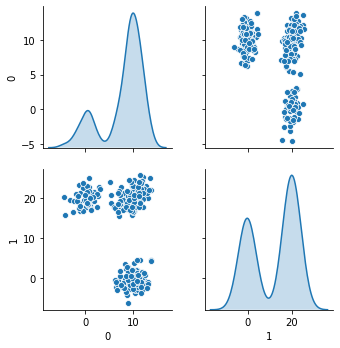

In [47]:
sns.pairplot(hcldf, diag_kind='kde')

### 11. Find out the linkage matrix

In [48]:
from sklearn.cluster import AgglomerativeClustering

Use ward as linkage metric and distance as Eucledian

In [49]:
hcmodel = AgglomerativeClustering(n_clusters=6, affinity='euclidean',  linkage='ward')

In [50]:
hcmodel.fit(hcldf)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='ward', memory=None, n_clusters=6,
                        pooling_func='deprecated')

In [51]:
hcmodel.labels_

array([2, 2, 2, 1, 1, 2, 2, 1, 2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 2, 1, 1,
       2, 1, 2, 1, 2, 2, 1, 1, 2, 1, 2, 2, 1, 2, 1, 2, 2, 1, 1, 1, 2, 1,
       2, 1, 2, 1, 1, 2, 2, 1, 2, 1, 1, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 1, 2, 2, 1, 1, 2, 2, 1, 2, 2, 1, 2, 1, 2, 1, 2, 2,
       2, 2, 1, 2, 2, 2, 1, 1, 2, 1, 2, 2, 4, 5, 4, 4, 5, 4, 5, 4, 5, 4,
       4, 5, 5, 4, 5, 4, 4, 4, 4, 4, 4, 5, 4, 4, 5, 4, 4, 5, 5, 4, 4, 4,
       5, 4, 4, 5, 4, 4, 4, 4, 4, 5, 4, 4, 4, 4, 4, 0, 5, 4, 0, 3, 3, 0,
       0, 0, 0, 3, 0, 0, 0, 0, 3, 0, 0, 3, 0, 0, 3, 0, 3, 3, 0, 3, 0, 0,
       3, 0, 3, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 3, 3, 0, 0, 0,
       0, 3, 3, 3, 0, 0, 0, 3, 3, 0, 0, 3, 0, 0, 0, 0, 3, 0, 0, 3, 3, 3,
       3, 3, 0, 0, 0, 0, 0, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 3, 0, 3, 3, 0,
       0, 0, 0, 3, 0, 0, 0, 3])

In [52]:
hcldf['labels'] = hcmodel.labels_

In [53]:
hcldf.groupby(["labels"]).count()

0   1
labels        
0       66  66
1       38  38
2       62  62
3       35  35
4       34  34
5       15  15

In [54]:
from scipy.cluster.hierarchy import cophenet, dendrogram, linkage
from scipy.spatial.distance import pdist

In [57]:
Z = linkage(hcldf, 'ward')
c, coph_dists = cophenet(Z , pdist(hcldf))
c

0.9543510497336868

In [58]:
distDf = pd.DataFrame(list(coph_dists), columns=['clusterDist'])
distDf['ecludianDist'] = pdist(hcldf)

In [59]:
distDf.head(5)

clusterDist  ecludianDist
0    15.128273      3.870482
1    12.188006      4.653404
2    23.575460      7.704648
3    23.575460     10.204468
4    12.188006      5.043402

### 12. Plot the dendrogram for the consolidated dataframe

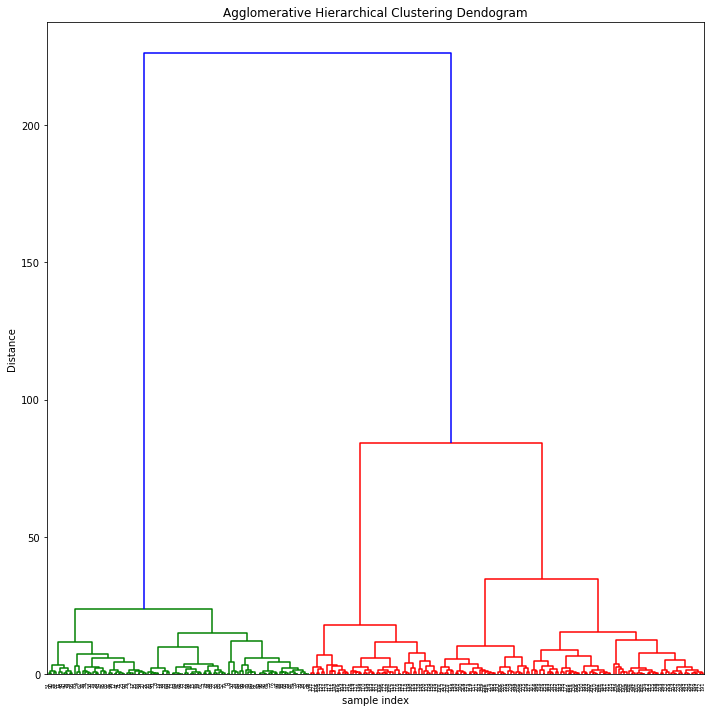

In [60]:
plt.figure(figsize=(10, 10))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(Z)
plt.tight_layout()

### 13. Recreate the dendrogram for last 12 merged clusters 

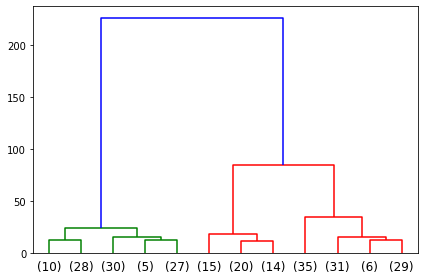

In [61]:
dendrogram(Z,truncate_mode='lastp',p=12)
plt.tight_layout()

Hint: Use truncate_mode='lastp' attribute in dendrogram function to arrive at dendrogram 

### 14. From the truncated dendrogram, find out the optimal distance between clusters which u want to use an input for clustering data

In [62]:
# Optimal distance which can be used as an input for clustring data is @50

In [63]:
# Set cut-off to max_d = 50

### 15. Using this distance measure and fcluster function to cluster the data into 3 different groups

In [64]:
from scipy.cluster.hierarchy import fcluster
z=fcluster(Z, t=50, criterion='distance')

In [65]:
z

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3], dtype=int32)

### Use matplotlib to visually observe the clusters in 2D space 

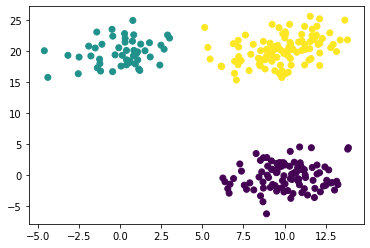

In [66]:
plt.scatter(hcdf[0],hcdf[1],c=z)